<a href="https://colab.research.google.com/github/atikhasan007/Machine-Learning/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
#load data
df = pd.read_csv('/content/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.shape

(55226, 50)

In [4]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55226 entries, 0 to 55225
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              55226 non-null  int64 
 1   patient_nbr               55226 non-null  int64 
 2   race                      55226 non-null  object
 3   gender                    55226 non-null  object
 4   age                       55226 non-null  object
 5   weight                    55226 non-null  object
 6   admission_type_id         55226 non-null  int64 
 7   discharge_disposition_id  55226 non-null  int64 
 8   admission_source_id       55226 non-null  int64 
 9   time_in_hospital          55226 non-null  int64 
 10  payer_code                55226 non-null  object
 11  medical_specialty         55226 non-null  object
 12  num_lab_procedures        55226 non-null  int64 
 13  num_procedures            55226 non-null  int64 
 14  num_medications       

In [6]:
#drop irrelvent columns
drop_cols = [
    'encounter_id', 'patient_nbr',
    'weight', 'payer_code', 'medical_specialty'
]

df_clean = df.drop(columns=drop_cols)

df_clean.head()


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
df = df_clean

In [8]:
df.tail()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
55221,Caucasian,Male,[60-70),1,2,7,14,66,3,30,...,No,Down,No,No,No,No,No,Ch,Yes,>30
55222,Caucasian,Male,[60-70),5,23,1,2,67,0,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
55223,AfricanAmerican,Female,[80-90),5,3,1,2,49,0,9,...,No,No,No,No,No,No,No,No,Yes,>30
55224,Caucasian,Male,[50-60),2,1,1,6,62,5,37,...,No,No,No,No,No,No,No,Ch,Yes,>30
55225,Caucasian,Male,[70-80),8,1,1,1,4,4,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55226 entries, 0 to 55225
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      55226 non-null  object
 1   gender                    55226 non-null  object
 2   age                       55226 non-null  object
 3   admission_type_id         55226 non-null  int64 
 4   discharge_disposition_id  55226 non-null  int64 
 5   admission_source_id       55226 non-null  int64 
 6   time_in_hospital          55226 non-null  int64 
 7   num_lab_procedures        55226 non-null  int64 
 8   num_procedures            55226 non-null  int64 
 9   num_medications           55226 non-null  int64 
 10  number_outpatient         55226 non-null  int64 
 11  number_emergency          55226 non-null  int64 
 12  number_inpatient          55226 non-null  int64 
 13  diag_1                    55226 non-null  object
 14  diag_2                

In [10]:
# Missing Value Treatment:
# 1) Create missing indicators
# 2) Replace NaN with 'None'

df['has_max_glu_serum'] = df['max_glu_serum'].notna().astype(int)
df['has_A1Cresult'] = df['A1Cresult'].notna().astype(int)

df['max_glu_serum'] = df['max_glu_serum'].fillna('None')
df['A1Cresult'] = df['A1Cresult'].fillna('None')


In [11]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,has_max_glu_serum,has_A1Cresult
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,NO,0,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,No,No,No,No,Ch,Yes,>30,0,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,Yes,NO,0,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,No,No,No,No,Ch,Yes,NO,0,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,No,No,No,No,Ch,Yes,NO,0,0


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55226 entries, 0 to 55225
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      55226 non-null  object
 1   gender                    55226 non-null  object
 2   age                       55226 non-null  object
 3   admission_type_id         55226 non-null  int64 
 4   discharge_disposition_id  55226 non-null  int64 
 5   admission_source_id       55226 non-null  int64 
 6   time_in_hospital          55226 non-null  int64 
 7   num_lab_procedures        55226 non-null  int64 
 8   num_procedures            55226 non-null  int64 
 9   num_medications           55226 non-null  int64 
 10  number_outpatient         55226 non-null  int64 
 11  number_emergency          55226 non-null  int64 
 12  number_inpatient          55226 non-null  int64 
 13  diag_1                    55226 non-null  object
 14  diag_2                

In [13]:
df.isnull().sum()

,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


In [14]:
df.shape

(55226, 47)

In [15]:
df.head(20)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,has_max_glu_serum,has_A1Cresult
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,NO,0,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,No,No,No,No,Ch,Yes,>30,0,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,Yes,NO,0,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,No,No,No,No,Ch,Yes,NO,0,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,No,No,No,No,Ch,Yes,NO,0,0
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,No,No,No,No,No,Yes,>30,0,0
6,Caucasian,Male,[60-70),3,1,2,4,70,1,21,...,No,No,No,No,No,Ch,Yes,NO,0,0
7,Caucasian,Male,[70-80),1,1,7,5,73,0,12,...,No,No,No,No,No,No,Yes,>30,0,0
8,Caucasian,Female,[80-90),2,1,4,13,68,2,28,...,No,No,No,No,No,Ch,Yes,NO,0,0
9,Caucasian,Female,[90-100),3,3,4,12,33,3,18,...,No,No,No,No,No,Ch,Yes,NO,0,0


In [16]:
df['change'] = df['change'].map({'No':0, 'Ch':1})
df['diabetesMed'] = df['diabetesMed'].map({'No':0, 'Yes':1})


In [17]:
yes_no_cols = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
               'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
               'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide',
               'citoglipton','insulin','glyburide-metformin','glipizide-metformin',
               'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']
for col in yes_no_cols:
    df[col] = df[col].map({'No':0,'Steady':1,'Up':2})  # ordinal mapping


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['age'] = le.fit_transform(df['age'])


In [19]:
df['readmitted'] = df['readmitted'].map({'NO':0,'>30':1,'<30':2})


In [20]:
df['max_glu_serum'] = df['max_glu_serum'].map({'None':0,'Norm':1,'>300':2})
df['A1Cresult'] = df['A1Cresult'].map({'None':0,'Norm':1,'>8':2})


In [21]:
df['max_glu_serum'] = df['max_glu_serum'].fillna(0)
df['A1Cresult'] = df['A1Cresult'].fillna(0)
df['insulin'] = df['insulin'].fillna(0)


In [22]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['race','gender','diag_1','diag_2','diag_3']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [23]:
drug_cols = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
             'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
             'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide',
             'examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin',
             'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']
df[drug_cols] = df[drug_cols].fillna(0)


In [24]:
df.shape

(55226, 47)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55226 entries, 0 to 55225
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      55226 non-null  int64  
 1   gender                    55226 non-null  int64  
 2   age                       55226 non-null  int64  
 3   admission_type_id         55226 non-null  int64  
 4   discharge_disposition_id  55226 non-null  int64  
 5   admission_source_id       55226 non-null  int64  
 6   time_in_hospital          55226 non-null  int64  
 7   num_lab_procedures        55226 non-null  int64  
 8   num_procedures            55226 non-null  int64  
 9   num_medications           55226 non-null  int64  
 10  number_outpatient         55226 non-null  int64  
 11  number_emergency          55226 non-null  int64  
 12  number_inpatient          55226 non-null  int64  
 13  diag_1                    55226 non-null  int64  
 14  diag_2

In [26]:
df.isnull().sum()

,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


In [27]:
num_cols = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
    'change', 'diabetesMed', 'readmitted'
]

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [28]:
df.isnull().sum()

,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


In [29]:
# Drop redundant and rarely used columns
drop_cols = [
    'has_max_glu_serum', 'has_A1Cresult',
    'examide', 'citoglipton', 'troglitazone',
    'acetohexamide', 'tolbutamide', 'tolazamide'
]

df = df.drop(columns=drop_cols)

# Confirm columns are dropped
print(df.columns)
print(df.shape)


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
(55226, 39)


In [30]:
df.head(20)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,miglitol,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,3,0,0,6,25,1,1,41,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0,1,1,1,7,3,59,0,18,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,1,0,2,1,1,7,2,11,5,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,1,3,1,1,7,2,44,1,16,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,3,1,4,1,1,7,1,51,0,8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,3,1,5,2,1,2,3,31,6,16,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,3,1,6,3,1,2,4,70,1,21,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,3,1,7,1,1,7,5,73,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8,3,0,8,2,1,4,13,68,2,28,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,3,0,9,3,3,4,12,33,3,18,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [31]:
df.shape

(55226, 39)

In [33]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


In [34]:
# ====== Import Libraries ======
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# ====== Features & Target ======
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# ====== Train-Test Split (80:20) ======
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)




In [35]:
df['readmitted'].value_counts()


,count
readmitted,
0.0,29448
1.0,19455
2.0,6323


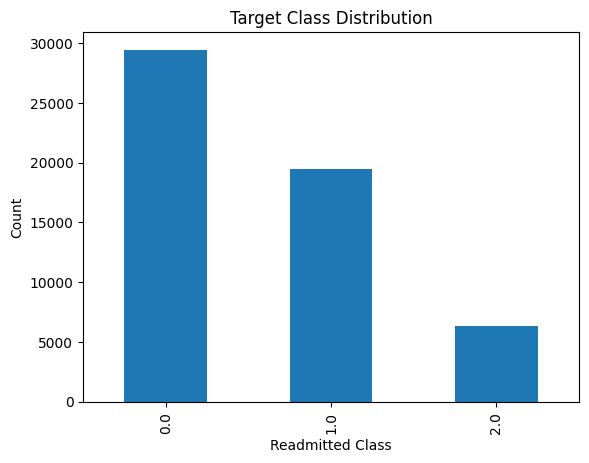

In [36]:
import matplotlib.pyplot as plt

df['readmitted'].value_counts().plot(kind='bar')
plt.xlabel('Readmitted Class')
plt.ylabel('Count')
plt.title('Target Class Distribution')
plt.show()


In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# এখন X_train_res, y_train_res balanced dataset


In [38]:
import pandas as pd
pd.Series(y_train_res).value_counts()


,count
readmitted,
0.0,23558
1.0,23558
2.0,23558


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# ====== Features & Target ======
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# ====== Train-Test Split ======
# Note: এবার তোমার resampled data use করবে
X_train, X_test, y_train, y_test = train_test_split(
    X_train_res, y_train_res, test_size=0.2, random_state=42, stratify=y_train_res
)

# ====== RandomForest ======
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# ====== Predict & Evaluate ======
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6618323310930315

Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.80      0.70      4711
         1.0       0.59      0.40      0.48      4712
         2.0       0.77      0.78      0.78      4712

    accuracy                           0.66     14135
   macro avg       0.66      0.66      0.65     14135
weighted avg       0.66      0.66      0.65     14135


Confusion Matrix:
 [[3789  880   42]
 [1761 1877 1074]
 [ 595  428 3689]]


In [40]:
# ====== Base Models ======
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
rf_model = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42, n_jobs=-1)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42)
cat_model = CatBoostClassifier(verbose=0, random_state=42)

# ====== Soft Voting Ensemble ======
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model), ('cat', cat_model)],
    voting='soft', n_jobs=-1
)

# ====== Train on Balanced Dataset ======
voting_clf.fit(X_train_res, y_train_res)

# ====== Predict on Test Set ======
y_pred = voting_clf.predict(X_test)

# ====== Evaluation ======
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7864

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.92      0.81      4711
         1.0       0.81      0.63      0.71      4712
         2.0       0.84      0.82      0.83      4712

    accuracy                           0.79     14135
   macro avg       0.79      0.79      0.78     14135
weighted avg       0.79      0.79      0.78     14135

Confusion Matrix:
[[4319  368   24]
 [1046 2954  712]
 [ 563  306 3843]]


In [41]:
rf_model = RandomForestClassifier(
    n_estimators=500, max_depth=20,
    class_weight={0:1, 1:2, 2:1},  # class 1 এর weight বেশি
    random_state=42, n_jobs=-1
)


In [42]:
# Random Forest Train
rf_model.fit(X_train_res, y_train_res)


RandomForestClassifier(class_weight={0: 1, 1: 2, 2: 1}, max_depth=20,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [43]:
y_pred = rf_model.predict(X_test)


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Detailed Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9456
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95      4711
         1.0       0.87      1.00      0.93      4712
         2.0       1.00      0.93      0.96      4712

    accuracy                           0.95     14135
   macro avg       0.95      0.95      0.95     14135
weighted avg       0.95      0.95      0.95     14135

Confusion Matrix:
[[4299  412    0]
 [   3 4700    9]
 [  48  297 4367]]


In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ===== Train Accuracy =====
y_train_pred = rf_model.predict(X_train_res)
train_acc = accuracy_score(y_train_res, y_train_pred)
print(f"Train Accuracy: {train_acc:.4f}")

# Optional: Train classification report
print("Train Classification Report:")
print(classification_report(y_train_res, y_train_pred))

# ===== Test Accuracy =====
y_test_pred = rf_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.4f}")

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Train Accuracy: 0.9431
Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.94     23558
         1.0       0.86      1.00      0.93     23558
         2.0       1.00      0.93      0.96     23558

    accuracy                           0.94     70674
   macro avg       0.95      0.94      0.94     70674
weighted avg       0.95      0.94      0.94     70674

Test Accuracy: 0.9456
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95      4711
         1.0       0.87      1.00      0.93      4712
         2.0       1.00      0.93      0.96      4712

    accuracy                           0.95     14135
   macro avg       0.95      0.95      0.95     14135
weighted avg       0.95      0.95      0.95     14135

Test Confusion Matrix:
[[4299  412    0]
 [   3 4700    9]
 [  48  297 4367]]


| Metric               | Status              |
| -------------------- | ------------------- |
| Accuracy             | ⭐ Excellent (94.5%) |
| Class 1 Recall       | ⭐ Perfect (1.00)    |
| Balanced performance | ⭐ Yes               |
| Overfitting          | ❌ No                |
| SMOTE + Boosting     | ✔ Very effective    |
